# <center> K-Means Clustering: Airline Customer Value Analysis </center>

In [1]:
# import library

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.21.5
pandas version :  1.4.2
seaborn version :  0.11.2


In [2]:
# Matplotlib Default Parameter

from matplotlib import rcParams
plt.style.use('fivethirtyeight')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

## Load Dataset

In [3]:
# Mounting to Google Drive

#from google.colab import drive
#drive.mount('/content/drive')

#path = '/content/drive/MyDrive/Rakamin/Final Project - Datskuyy/HW Unsupervised /flight.csv'
#df = pd.read_csv(path)

#df.head()

In [4]:
df = pd.read_csv('flight.csv')

In [5]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
8742,56756,9/8/2007,9/20/2007,Male,6,.,beijing,CN,55.0,3/31/2014,...,20031.0,21754,2/24/2014,37,39.916667,269,0,1.108508,28461,1
40630,37813,9/19/2012,9/19/2012,Male,4,beijing,beijing,CN,30.0,3/31/2014,...,0.0,5295,11/25/2012,493,22.333333,66,0,0.852181,4236,0
6882,31888,9/30/2011,10/7/2011,Female,4,tianjinshi,tianjin,CN,38.0,3/31/2014,...,18243.0,33685,2/5/2014,56,34.052632,151,0,0.835038,33762,25
51462,28994,3/7/2013,2/3/2014,Female,4,shanwei,guangdong,CN,29.0,3/31/2014,...,2468.0,2892,2/23/2014,38,20.000000,20,0,0.875000,2666,0
26771,26378,11/8/2009,12/10/2009,Male,4,shenyang,liaoning,CN,38.0,3/31/2014,...,2569.0,13952,2/23/2014,38,60.363636,151,0,0.626262,6553,0


In [6]:
# Cek jumlah fitur dan baris

print('Total Rows :', df.shape[0])
print('Total Features :', df.shape[1])

Total Rows : 62988
Total Features : 23


# Exploratory Data Analysis (EDA)

## 1. Descriptive Analysis

### a. Check Dtype

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [8]:
# Grouping Features Based on Their Data Type

nums = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
cats = df.select_dtypes(exclude=[np.number]).columns

#### - Numeric

In [9]:
# statistical summary of numeric features

df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


Extreme value of  `age` (110) doesnt make sense.

#### Categorical

In [10]:
# statistical summary of categorical features

df[cats].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


In [11]:
# lihat jumlah unique values

df[cats].nunique()

FFP_DATE             3068
FIRST_FLIGHT_DATE    3406
GENDER                  2
WORK_CITY            3234
WORK_PROVINCE        1165
WORK_COUNTRY          118
LOAD_TIME               1
LAST_FLIGHT_DATE      731
dtype: int64

In [12]:
df[cats].dtypes

FFP_DATE             object
FIRST_FLIGHT_DATE    object
GENDER               object
WORK_CITY            object
WORK_PROVINCE        object
WORK_COUNTRY         object
LOAD_TIME            object
LAST_FLIGHT_DATE     object
dtype: object

`FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME` dan `LAST_FLIGHT_DATE` akan diconvert menjadi tipe date.

### b. Missing values

In [13]:
# check missing value

df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Ada beberapa kolom null yaitu: `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, dan `SUM_YR_2`.

### 3. Check Duplicated Rows

In [14]:
df.duplicated().any()

False

In [15]:
df.duplicated().sum()

0

Tidak ada kolom terduplikasi

<b> 4. Summary </b>

In [16]:
df.columns

Index(['MEMBER_NO', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'FFP_TIER',
       'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'LOAD_TIME',
       'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM',
       'LAST_FLIGHT_DATE', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')

In [17]:
# Create summry data Info
list = []

for col in df.columns:
    list.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique()])
df_summary = pd.DataFrame(data=list, columns=['feature', 'data_type', 'null_num','%null','nunique'])
df_summary

,feature,data_type,null_num,%null,nunique
0,MEMBER_NO,int64,0,0.000000,62988
1,FFP_DATE,object,0,0.000000,3068
2,FIRST_FLIGHT_DATE,object,0,0.000000,3406
3,GENDER,object,3,0.004763,2
4,FFP_TIER,int64,0,0.000000,3
5,WORK_CITY,object,2269,3.602273,3234
6,WORK_PROVINCE,object,3248,5.156538,1165
7,WORK_COUNTRY,object,26,0.041278,118
8,AGE,float64,420,0.666794,84
9,LOAD_TIME,object,0,0.000000,1


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
feature,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,...,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,L,R,F,M,C
data_type,int64,datetime64[ns],datetime64[ns],int64,float64,datetime64[ns],int64,int64,float64,float64,...,int64,int64,float64,int64,int64,timedelta64[ns],int64,int64,int64,float64
null_num,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
%null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nunique,52586,3061,3372,2,59,1,51,18919,12432,13239,...,537,4,44953,19822,25,3061,729,51,24424,44953


## 2. Univariate Analysis

###  1. Boxplot and Violinplot

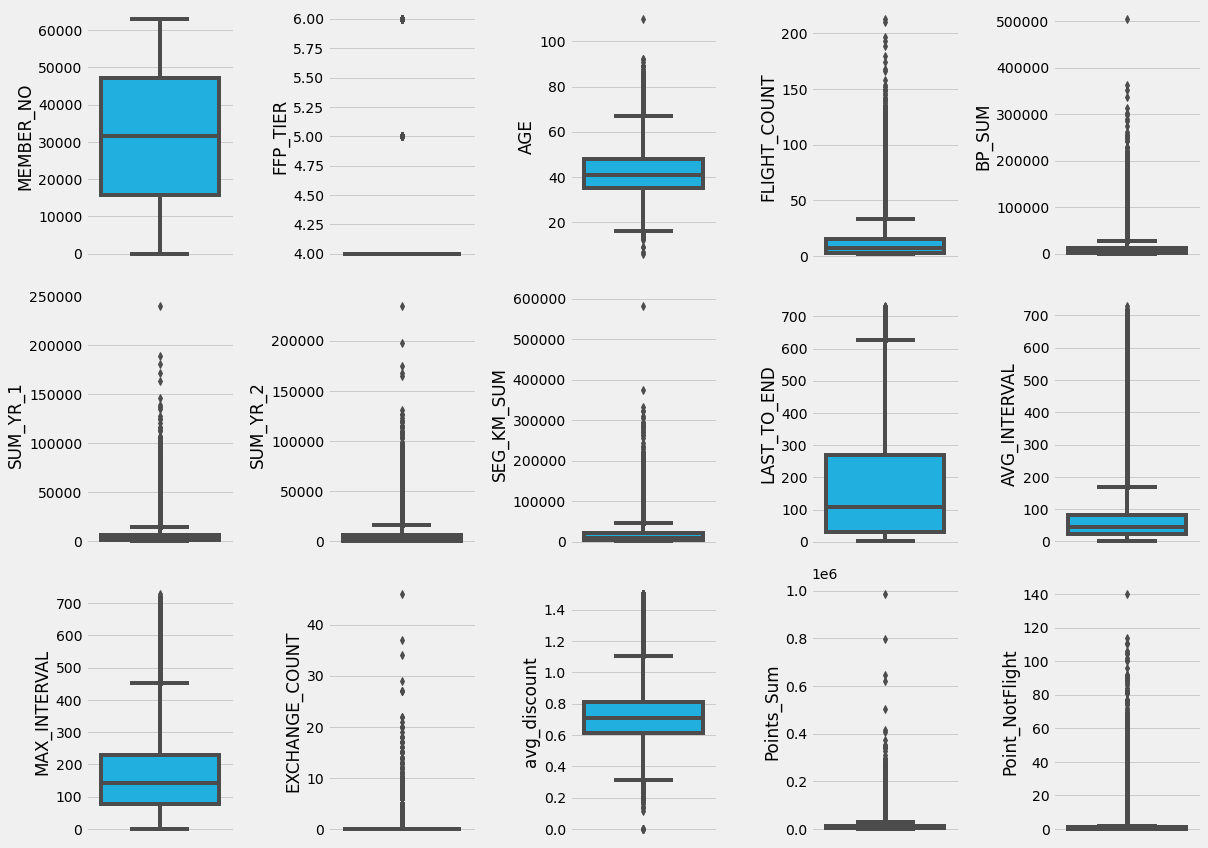

In [18]:
plt.figure(figsize = (17,12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y = df[nums[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

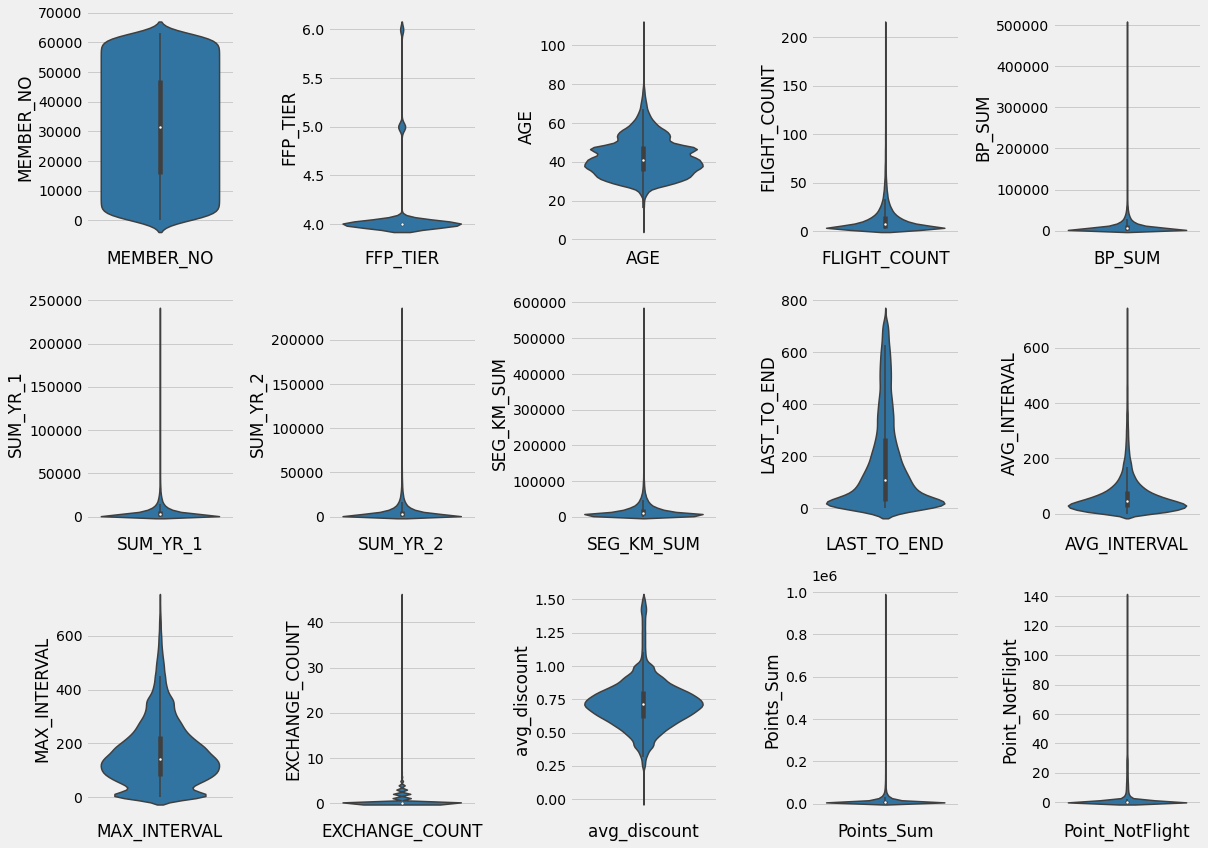

In [19]:
# Create violinplot for numeric feature

plt.figure(figsize=(17,12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=df[nums[i]], linewidth=1.5)
    plt.xlabel(nums[i])
    plt.tight_layout()

- Ada banyak kolom numerik yang punya outlier dan right-skewed
- Cek feature `FFP_Tier` kategorikal karena terlihat diskrit nilainya dari 4 ke 6.

### 2. Distribution Plot

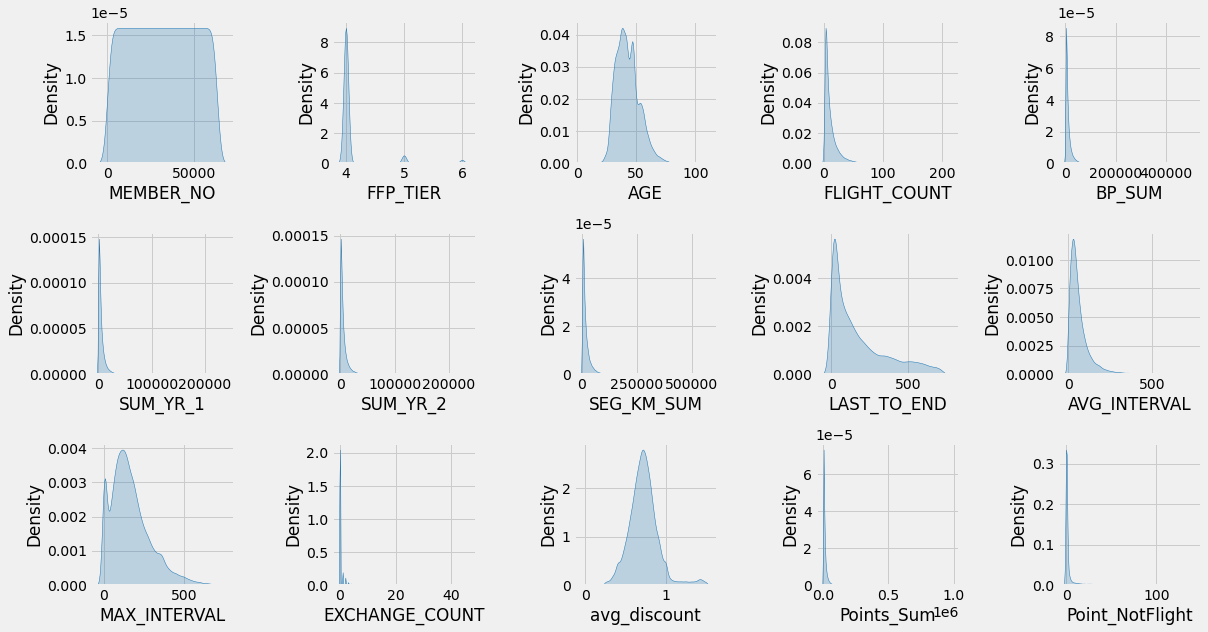

In [20]:
plt.figure(figsize=(17,9))
for i in range(0, len(nums)):
    plt.subplot(3,5, i+1)
    sns.kdeplot(data=df, x=df[nums[i]], fill='True')
    plt.tight_layout()

`avg_discount`has strange value (more than 1 or 100%)

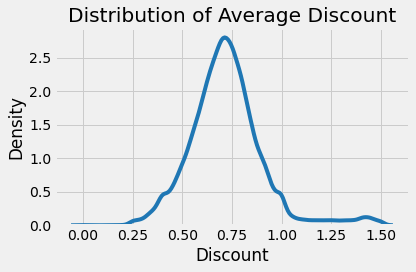

In [21]:
# lihat kde plot pada fitur diskon

ax = sns.kdeplot(x = df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

It makes no sense that `avg_discount` has values more than 1 (100%)

In [22]:
# hapus baris yang punya diskon lebih dari 100%

df = df[df['avg_discount']<=1]
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,60041.0,31505.292833,18191.245419,1.0,15736.000000,31528.00000,47269.000000,62988.0
FFP_TIER,60041.0,4.081727,0.328371,4.0,4.000000,4.00000,4.000000,6.0
AGE,59652.0,42.174797,9.771595,6.0,35.000000,41.00000,48.000000,110.0
FLIGHT_COUNT,60041.0,11.654220,13.756290,2.0,3.000000,7.00000,14.000000,210.0
BP_SUM,60041.0,10034.104778,14010.728738,0.0,2432.000000,5457.00000,12133.000000,505308.0
SUM_YR_1,59499.0,4974.437205,7059.121002,0.0,968.000000,2700.00000,6285.500000,239560.0
SUM_YR_2,59907.0,5210.832374,7667.312231,0.0,755.000000,2676.00000,6531.000000,234188.0
SEG_KM_SUM,60041.0,16772.027931,20335.635374,368.0,4713.000000,9878.00000,20893.000000,580717.0
LAST_TO_END,60041.0,177.260855,184.117824,1.0,30.000000,109.00000,270.000000,731.0
AVG_INTERVAL,60041.0,67.875748,77.374097,0.0,23.500000,44.87500,82.400000,728.0


New dataset with no discount more than 100%

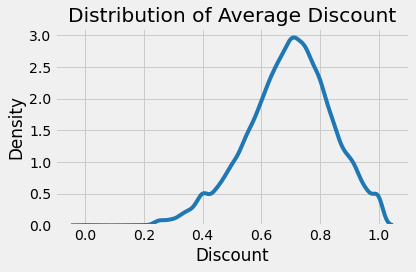

In [23]:
ax = sns.kdeplot(x = df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

No discount > 100%

### 3. Countplot

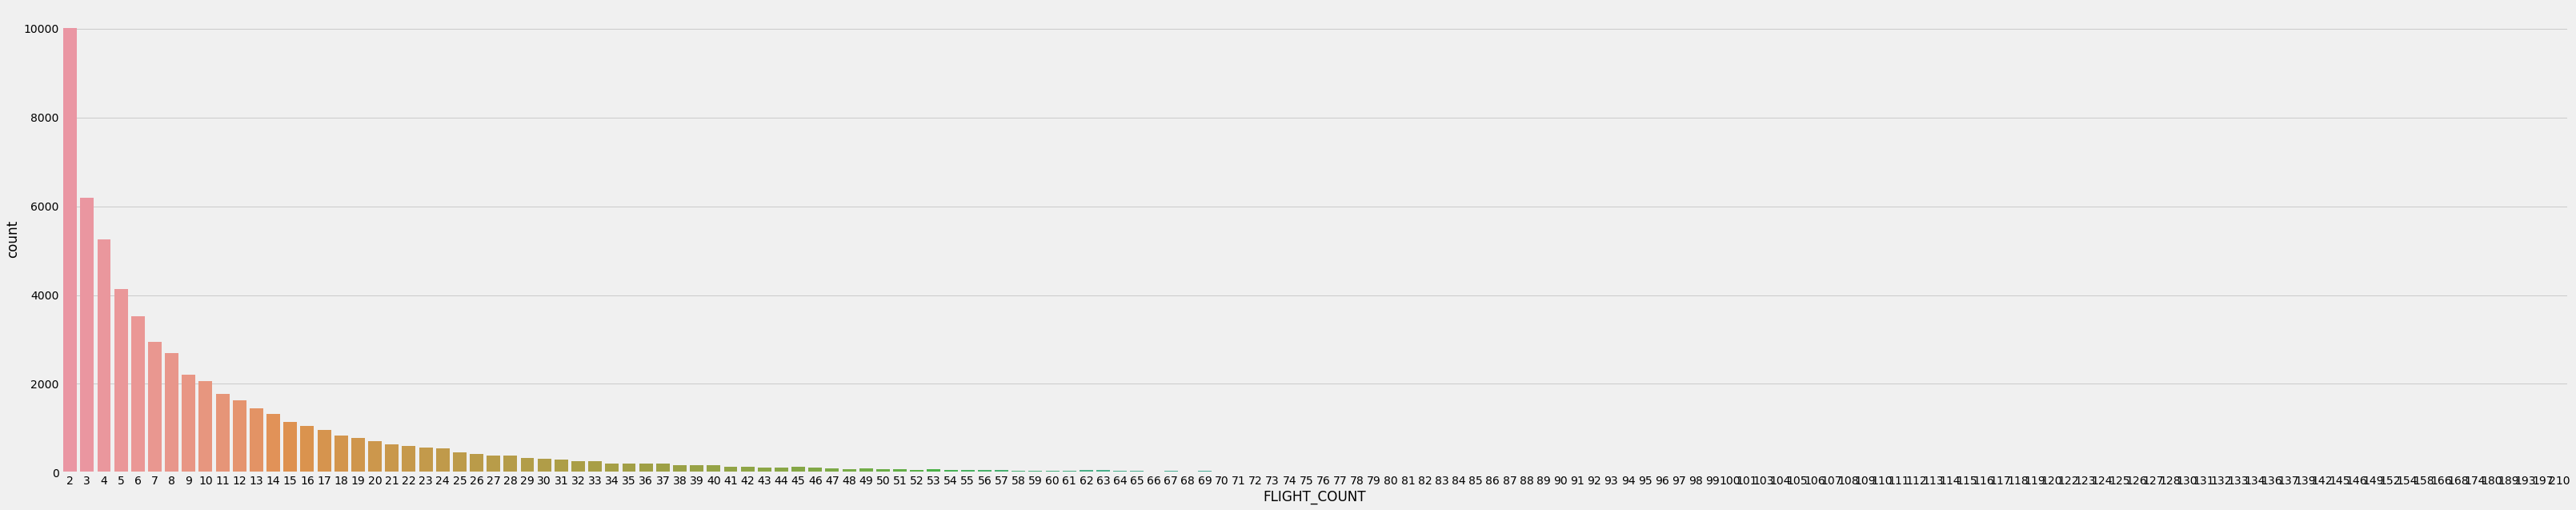

In [24]:
plt.figure(figsize=(50,10))
ax = sns.countplot(x=df["FLIGHT_COUNT"])

Jumlah penerbangan customer cenderung tidak banyak, makin banyak jumlah penerbangannya makin sedikit customernya

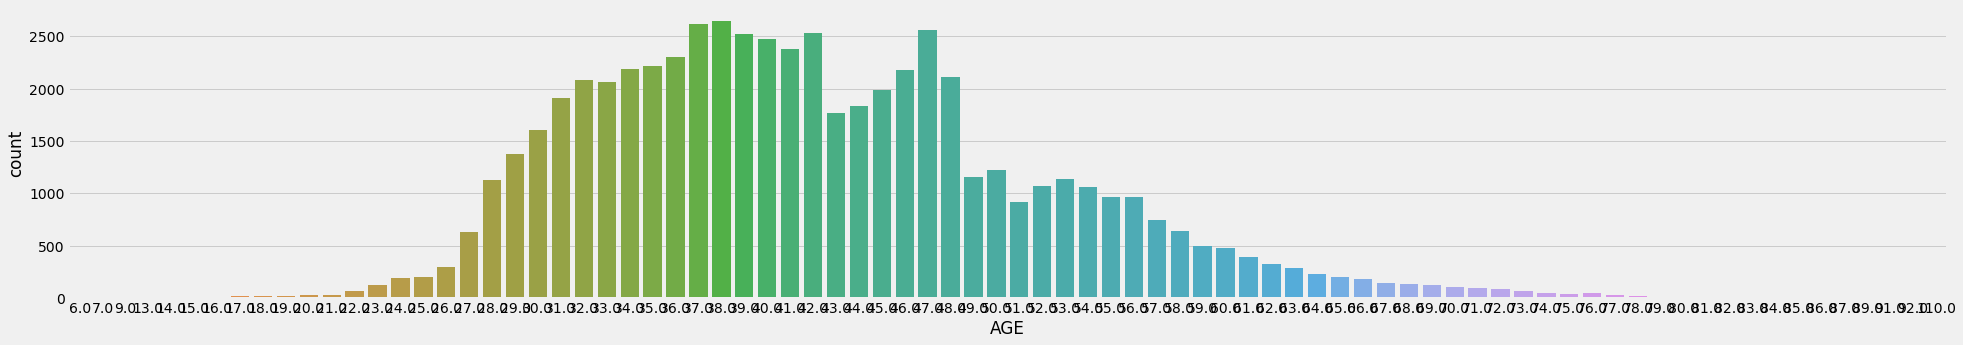

In [25]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x=df["AGE"])

Kebanyakan customer dari usia 26-60.

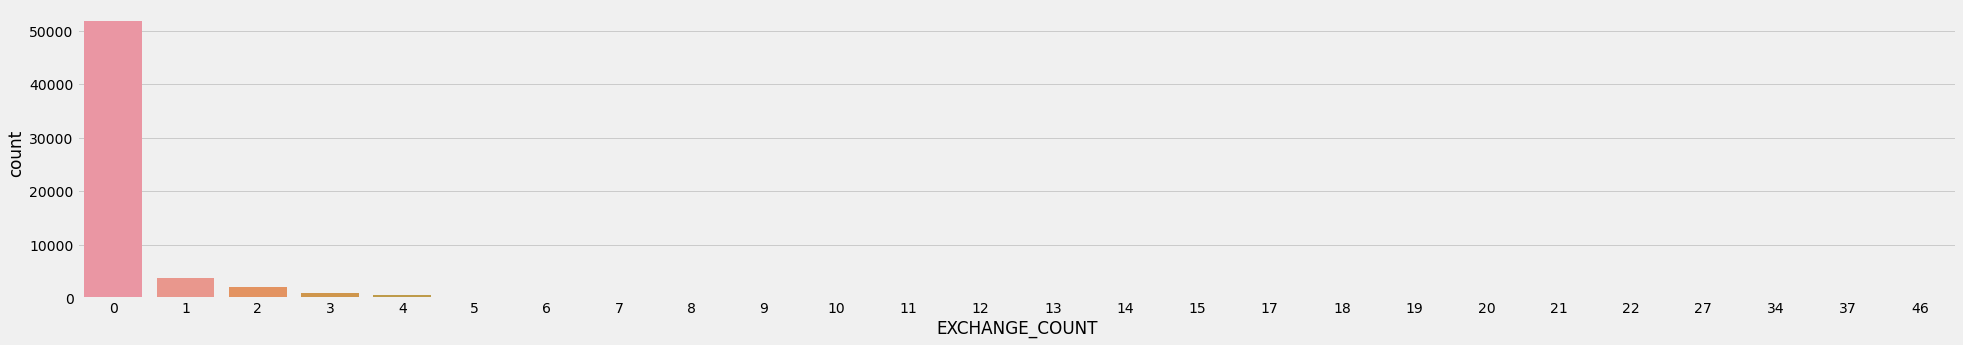

In [26]:
plt.figure(figsize=(30,5))
ax = sns.countplot(x=df["EXCHANGE_COUNT"])

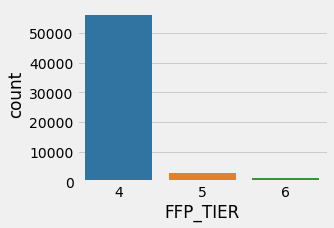

In [27]:
plt.figure(figsize=(4,3))
ax = sns.countplot(x=df["FFP_TIER"])

Feature `FFP_TIER` `adalah feature categorical.

## Multivariat Analysis

### Heatmap Plot

<AxesSubplot:>

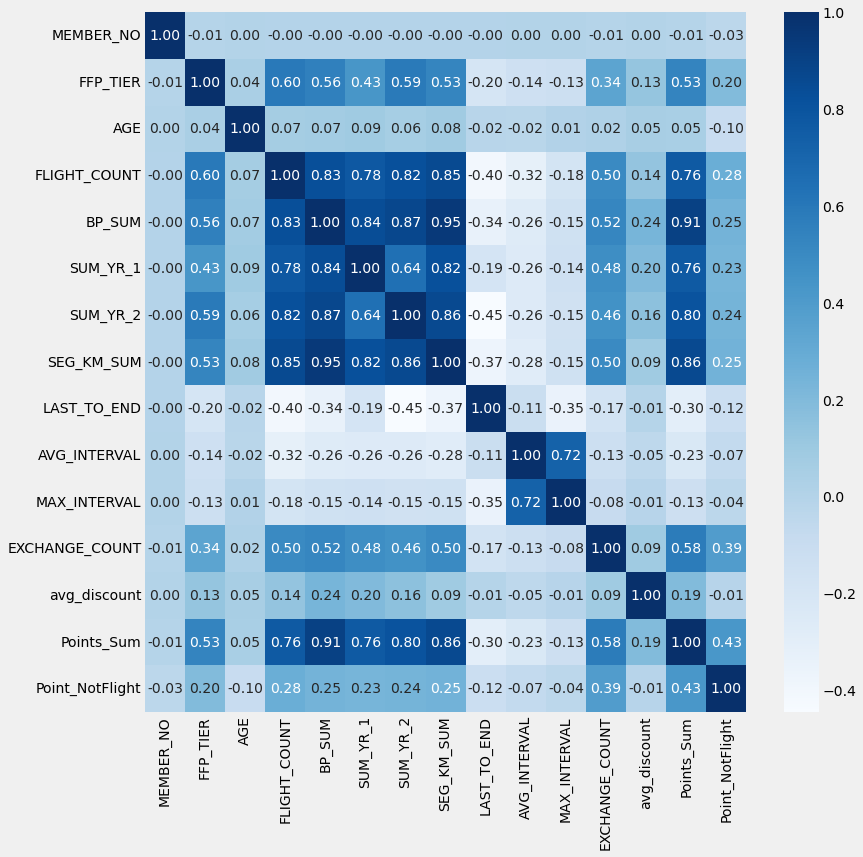

In [28]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Some columns have high correlation each other (high multicolinearity)
- `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, and `Points_Sum` have high multicolinearity.
- `AVG_INTERVAL` dan `MAX_INTERVAL` have high multicolinearity.
- `AGE` has very low correlation with all features.

# Data Pre-Processing

## 1. Handling Missing Values

In [29]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  1
FFP_TIER                0
WORK_CITY            2102
WORK_PROVINCE        3019
WORK_COUNTRY           23
AGE                   389
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              542
SUM_YR_2              134
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [30]:
# missing values input at age features with median value

df['AGE'] = df['AGE'].fillna(df['AGE'].median())

In [31]:
# missing values iput at SUM_YR_1 dan SUM_YR_2 with o value

df['SUM_YR_1'] = df['SUM_YR_1'].fillna(0)
df['SUM_YR_2'] = df['SUM_YR_2'].fillna(0)

`WORK_CITY`, `WORK_PROVINCE`, and`WORK_COUNTRY` will be dropped because too many unique values and considered as categorical 

In [32]:
# drop kolom work_city, work_province, work_country

df = df.drop(['GENDER','WORK_CITY','WORK_PROVINCE','WORK_COUNTRY'], axis = 1)

In [33]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
FFP_TIER             0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

No missing values found.

## 2. Feature Engineering

change datatype of feature `FFP_DATE`, `FFP_FLIGHT_DATE`, `LAST_FLIGHT_DATE`, `LAST_TO_END` to datetime datatype.

In [34]:
# change to datetime

df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'], errors='coerce')
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'], errors='coerce')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'], errors='coerce')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60041 entries, 0 to 62987
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          60041 non-null  int64         
 1   FFP_DATE           60041 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  60041 non-null  datetime64[ns]
 3   FFP_TIER           60041 non-null  int64         
 4   AGE                60041 non-null  float64       
 5   LOAD_TIME          60041 non-null  datetime64[ns]
 6   FLIGHT_COUNT       60041 non-null  int64         
 7   BP_SUM             60041 non-null  int64         
 8   SUM_YR_1           60041 non-null  float64       
 9   SUM_YR_2           60041 non-null  float64       
 10  SEG_KM_SUM         60041 non-null  int64         
 11  LAST_FLIGHT_DATE   59640 non-null  datetime64[ns]
 12  LAST_TO_END        60041 non-null  int64         
 13  AVG_INTERVAL       60041 non-null  float64       
 14  MAX_IN

## 3. Outlier Handling

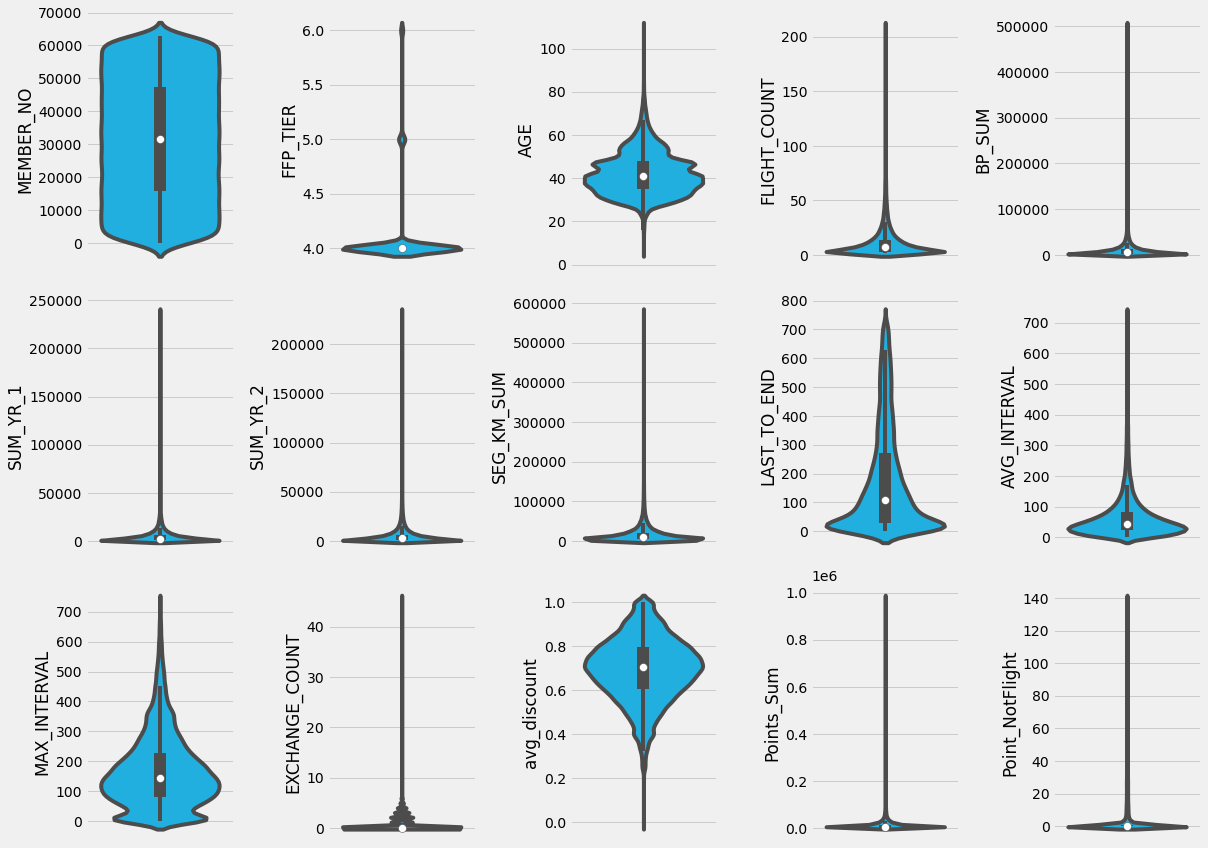

In [36]:
# boxplot

plt.figure(figsize = (17,12))
for i in range(0, len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y = df[nums[i]], orient='v', color = 'deepskyblue')
    plt.tight_layout()

Drop outlier with z-score method

In [38]:
from scipy import stats
import numpy as np

# Handling Outlier using Z-score

print(f'Total Rows BEFORE Outlier Handling = {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries 
    
df = df[filtered_entries] 

print(f'Total Rows AFTER Outlier Handling = {len(df)}')

Total Rows BEFORE Outlier Handling = 60041
Total Rows AFTER Outlier Handling = 52586


## 4. Feature Selection

LRFMC analysis is an extended version of RFM analysis that has been used in the aviation industry for years to divide customers into segments. Based on LRFMC analysis we will need 5 variables:

- L (Length of joining member) : The number of months since the member’s joining time from the end of the observation time. => LOAD_TIME - FFP_DATE

- R (Recent flight) : Number of months since the member’s last flight from the end of observation time. => LAST_TO_END

- F (Flight Count) : The total number of times the member has flown during the observation period. => FLIGHT_COUNT

- M (Miles Accumulated) : Miles accumulated during member observation time. => SEG_KM_SUM

- C (Discount Used) : The average value of the discount factor used by the member during the observation period. => avg_discount

In [39]:
# create new feature

df['L'] = df['LOAD_TIME'] - df1['FFP_DATE']
df['R'] = df['LAST_TO_END']
df['F'] = df['FLIGHT_COUNT']
df['M'] = df['SEG_KM_SUM']
df['C'] = df['avg_discount']

In [40]:
# ambil feature L, R, F, M, C saja

df_cust = df[['L', 'R', 'F', 'M', 'C']]
df_cust

,L,R,F,M,C
1486,1561 days,41,18,76005,0.786950
1490,1686 days,69,9,74714,0.799971
1508,1118 days,57,10,75964,0.781936
1594,1534 days,1,37,77711,0.746389
1609,2190 days,121,12,75167,0.768661
...,...,...,...,...,...
62965,1942 days,418,2,368,0.750000
62966,627 days,412,2,368,0.750000
62974,3249 days,89,2,368,0.710000
62975,1961 days,121,2,368,0.670000


In [52]:
# cek dytpes

df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52586 entries, 1486 to 62978
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype          
---  ------  --------------  -----          
 0   L       52586 non-null  timedelta64[ns]
 1   R       52586 non-null  int64          
 2   F       52586 non-null  int64          
 3   M       52586 non-null  int64          
 4   C       52586 non-null  float64        
dtypes: float64(1), int64(3), timedelta64[ns](1)
memory usage: 2.4 MB


In [41]:
# change dataype of L to integer (timedelta -> str -> int)

df_cust['L'] = df_cust['L'].astype(str)

In [42]:
df_cust['L'] = df_cust['L'].str.split().str[0]

In [45]:
df_cust['L'] = df_cust['L'].astype(int)

In [46]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52586 entries, 1486 to 62978
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   L       52586 non-null  int32  
 1   R       52586 non-null  int64  
 2   F       52586 non-null  int64  
 3   M       52586 non-null  int64  
 4   C       52586 non-null  float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 2.2 MB


## 5. Standardization

In [48]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
custvalue_std = std.fit_transform(df_cust)
custvalue_std

array([[ 0.14395292, -0.78397394,  0.9335119 ,  4.90118161,  0.65132087],
       [ 0.29369062, -0.63444093, -0.07903104,  4.79945954,  0.74271167],
       [-0.3867175 , -0.69852651,  0.03347373,  4.89795108,  0.61613104],
       ...,
       [ 2.16601084, -0.52763164, -0.86656444, -1.05850239,  0.11126705],
       [ 0.62311356, -0.35673676, -0.86656444, -1.05850239, -0.16946435],
       [-0.42984196,  0.50307805, -0.86656444, -1.02761544, -2.90659546]])

In [49]:
dfcust_std = pd.DataFrame(custvalue_std, columns = df_cust.columns)
dfcust_std.head()

,L,R,F,M,C
0,0.143953,-0.783974,0.933512,4.901182,0.651321
1,0.293691,-0.634441,-0.079031,4.799460,0.742712
2,-0.386717,-0.698527,0.033474,4.897951,0.616131
3,0.111610,-0.997593,3.071103,5.035603,0.366655
4,0.897433,-0.356737,0.258483,4.835153,0.522968


# CLUSTERING: K-MEANS

In [50]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(dfcust_std)
    inertia.append(kmeans.inertia_)

<AxesSubplot:>

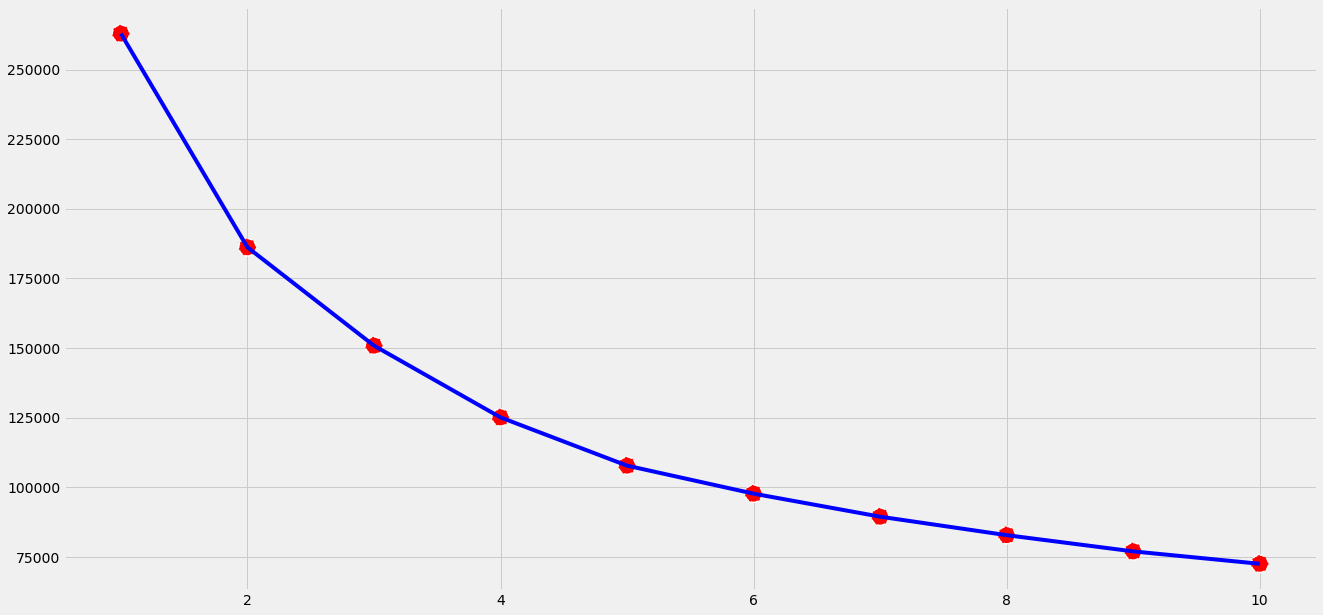

In [51]:
# lihat inertia plot untuk menentukan jumlah cluster

plt.figure(figsize=(20,10))

sns.lineplot(x=range(1,11), y = inertia, color = 'blue', linewidth = 4)
sns.scatterplot(x=range(1,11), y = inertia, s = 300, color = 'red', linestyle = '--')

ambil n_cluster = 4

In [52]:
# cluster n=4
kmeans = KMeans(n_clusters = 4, random_state = 0)

# fit model
kc = kmeans.fit(dfcust_std)
cluster_labels = kc.labels_

# add cluster
datacust_cluster = dfcust_std.assign(K_Cluster = cluster_labels)
datacust_cluster.head()

,L,R,F,M,C,K_Cluster
0,0.143953,-0.783974,0.933512,4.901182,0.651321,0
1,0.293691,-0.634441,-0.079031,4.799460,0.742712,0
2,-0.386717,-0.698527,0.033474,4.897951,0.616131,0
3,0.111610,-0.997593,3.071103,5.035603,0.366655,0
4,0.897433,-0.356737,0.258483,4.835153,0.522968,0


In [53]:
# add cluster to df_cust
cust_cluster = df_cust.assign(K_Cluster = cluster_labels)
cust_cluster.head()

,L,R,F,M,C,K_Cluster
1486,1561,41,18,76005,0.786950,0
1490,1686,69,9,74714,0.799971,0
1508,1118,57,10,75964,0.781936,0
1594,1534,1,37,77711,0.746389,0
1609,2190,121,12,75167,0.768661,0


## PCA

In [54]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(datacust_cluster)
pcs = pca.transform(datacust_cluster)

In [55]:
data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['cluster'] = datacust_cluster['K_Cluster']
data_pca.sample(10, random_state=123)

,PC 1,PC 2,cluster
29892,0.131678,-1.186503,1
41645,-0.336346,-0.194495,1
11810,1.170430,-0.650946,1
32439,-1.129930,0.264797,2
33842,-0.268424,-0.624800,1
18236,-0.478877,2.282914,3
52129,-0.882802,-1.953957,1
44645,-2.269311,-0.167541,2
2133,3.433517,0.980586,0
8010,1.102099,-0.930809,1


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

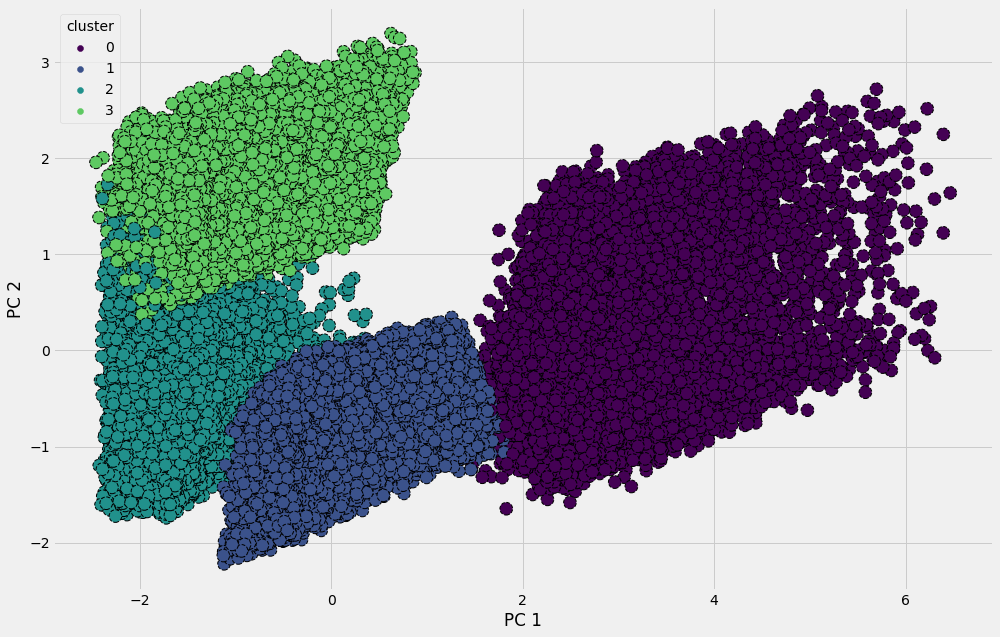

In [56]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['#440154','#3b528b','#21918c','#5ec962'],
    s=160,
    ax=ax
)

# Model Analysis

## A. Distribution

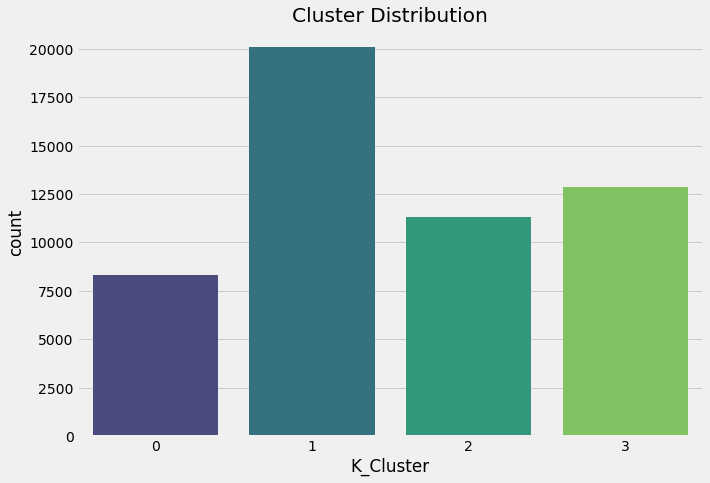

In [57]:
plt.figure(figsize=(10,7))
pl = sns.countplot(x = cust_cluster['K_Cluster'], palette='viridis')
pl.set_title('Cluster Distribution')
plt.show()

## B. LRFMC

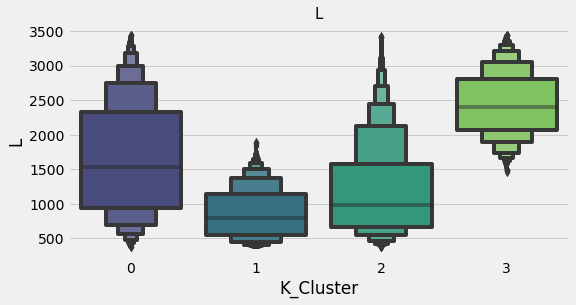

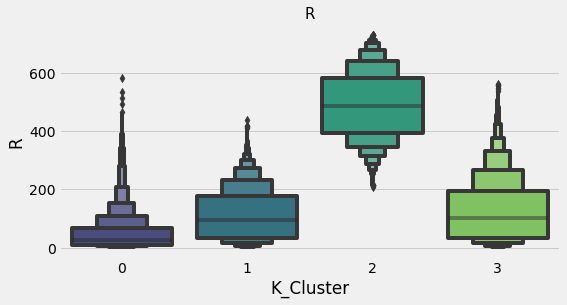

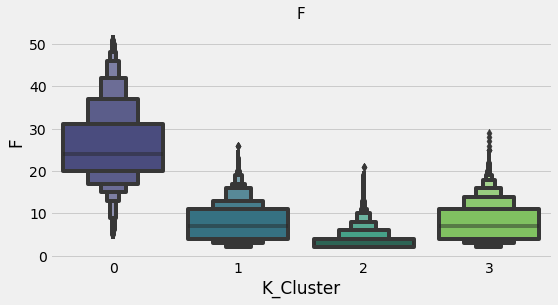

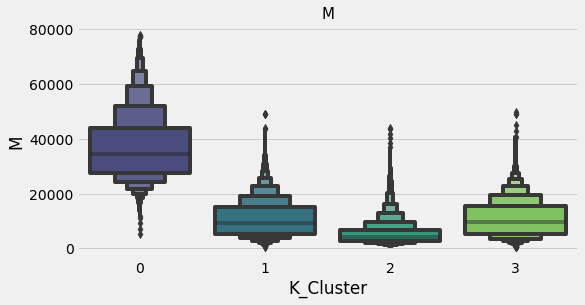

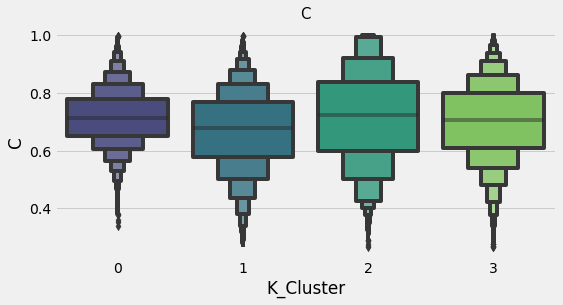

In [65]:
for i in df_cust.columns:
  plt.figure(figsize=(8,4))
  pl = sns.boxenplot(x = cust_cluster['K_Cluster'], y = cust_cluster[i], palette='viridis')
  pl.set_title(i, fontsize=15)
plt.show()

In [59]:
#cust_cluster.sample(10)

,L,R,F,M,C,K_Cluster
5813,749,120,13,44826,0.697273,0
31386,414,84,6,7772,0.902326,1
7888,439,10,31,29934,0.861800,0
44827,1915,26,3,5460,0.670064,3
19666,700,40,21,17378,0.715430,1
12752,1354,95,23,21031,0.866725,0
22057,2427,1,11,13560,0.813413,3
35165,395,49,4,8817,0.665233,1
3662,3265,12,32,48686,0.822463,0
13324,1649,90,21,24619,0.714283,0


In [61]:
# create pivot table K-Cluster aggregation

pivot_cc =  cust_cluster.groupby('K_Cluster').agg({'L': ['mean','median'],
                                                     'R': ['mean','median'],
                                                     'F': ['mean','median'],
                                                     'M': ['mean','median'],
                                                     'C': ['mean','median']}).reset_index()

In [62]:
pivot_cc

K_Cluster            L                   R                 F         \
                    mean  median        mean median       mean median   
0         0  1649.972379  1535.0   49.594812   25.0  26.004563   24.0   
1         1   860.074690   797.0  114.092317   96.0   7.605338    7.0   
2         2  1186.243756   978.0  488.576439  487.0   3.602480    3.0   
3         3  2433.846578  2393.0  128.454835  103.0   7.780847    7.0   

              M                  C            
           mean   median      mean    median  
0  36818.721028  34325.0  0.715935  0.714094  
1  10820.552208   9412.0  0.669370  0.678153  
2   5416.018158   4153.0  0.715294  0.725000  
3  10922.126416   9591.5  0.700152  0.706322

Key takes:
- Discount used is not too significant among all the clusters (68%-72%)
- Cluster 3 is the most senior cluster among others with average 2433 days since become member
- Characteristic of Cluster 3 and 1 is alomst identical, except the cluster 3 is the 'oldest' and cluster 1 is the 'youngest' among other clusters.
- Cluster 1 is the most loyal cluster because the have the most number of flight count and flight distance, the shortest flight recency and considered as senior cluster averaging 1535 days.
- Cluster 2 has the longest flight recency (more than 1 year), the fewest flight count, the shortest flight distance among other clusters and can be considerd as junor member because length day of joining member is only higher than cluster 1.

## Business Recommendation

1. Create a loyalty membership based on this clustering, example Gold for cluster 0, Silver for cluster 1 and 3, and Bronze for cluster 2.
2. Avoid churn customer, especially for cluster 2 becasue they have not flight in recent times. Give push notification or special promo/discount when they start to book the flight.
3. Engage cluster 2 to become more loyal because they are new members but already active and often